## Task 1 Data Strategy – Customer Profiling

In [1]:
#importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade scikit-learn
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#! pip install warnings
import warnings
warnings.filterwarnings("ignore")
#warnings.filterwarnings("default")

In [2]:
#Redaing the dataset
df=pd.read_csv('LBG Step Up Data Set.csv',index_col='id')
#df=df.fillna(0)
df

addr_state  annual_inc emp_length  \
id                                           
802173           CA     72000.0    3 years   
14518910         TX     97500.0     1 year   
54333324         NY    120000.0     1 year   
62247022         CA    130000.0  10+ years   
71986114         TX     58296.0  10+ years   
...             ...         ...        ...   
67809746         NY    300000.0    5 years   
66360297         IL    120000.0    9 years   
59699673         TX     85000.0  10+ years   
83334760         CA     22000.0    3 years   
14939090         FL    200000.0    3 years   

                                        emp_title home_ownership  installment  \
id                                                                              
802173                   CA. Dept. Of Corrections       MORTGAGE       395.66   
14518910      Curriculum & Implementation Manager           RENT       966.47   
54333324                          Senior manager            RENT       806.57   
62247022                      Border Patrol Agent           RENT       846.17   
71986114                          Account Manager       MORTGAGE        41.79   
...                                           ...            ...          ...   
67809746                                 Director       MORTGAGE       164.22   
66360297                               Journalist       MORTGAGE       455.96   
59699673                         Process Operator       MORTGAGE       390.36   
83334760    Instructional Specialist/Applications           RENT       213.89   
14939090  ceritified registered nurse anesthetist       MORTGAGE       572.29   

          loan_amnt             purpose        term int_rate  ...  num_il_tl  \
id                                                            ...              
802173        12000  debt_consolidation   36 months   11.49%  ...        NaN   
14518910      35000  debt_consolidation   60 months   21.99%  ...        2.0   
54333324      25000         credit_card   36 months    9.99%  ...        2.0   
62247022      25225  debt_consolidation   36 months   12.69%  ...        9.0   
71986114       1200               other   36 months   15.31%  ...        7.0   
...             ...                 ...         ...      ...  ...        ...   
67809746       5000         credit_card   36 months   11.22%  ...       22.0   
66360297      14000  debt_consolidation   36 months   10.64%  ...       22.0   
59699673      11925         credit_card   36 months   10.99%  ...       10.0   
83334760       6000  debt_consolidation   36 months   16.99%  ...        1.0   
14939090      21075    home_improvement   60 months   21.18%  ...       34.0   

          num_op_rev_tl  num_tl_90g_dpd_24m  num_tl_op_past_12m  open_acc  \
id                                                                          
802173              NaN                 NaN                 NaN        16   
14518910           12.0                 0.0                 1.0        13   
54333324            7.0                 0.0                 1.0         8   
62247022            3.0                 0.0                 2.0         8   
71986114            6.0                 0.0                 0.0         9   
...                 ...                 ...                 ...       ...   
67809746            8.0                 0.0                 3.0        15   
66360297            9.0                 0.0                 4.0        22   
59699673           14.0                 0.0                 2.0        17   
83334760            6.0                 0.0                 0.0         6   
14939090            6.0                 0.0                 2.0        27   

          percent_bc_gt_75  pub_rec_bankruptcies  total_acc  \
id                                                            
802173                 NaN                     0         23   
14518910              87.5                     0         24   
54333324             100.0                     0         16  

In [3]:
#dropping some input features
df1=df[['annual_inc','home_ownership','installment','loan_amnt','term','int_rate','avg_cur_bal','max_bal_bc','pub_rec_bankruptcies','total_acc','total_bal_ex_mort','loan_status']]
df1

annual_inc home_ownership  installment  loan_amnt        term  \
id                                                                        
802173       72000.0       MORTGAGE       395.66      12000   36 months   
14518910     97500.0           RENT       966.47      35000   60 months   
54333324    120000.0           RENT       806.57      25000   36 months   
62247022    130000.0           RENT       846.17      25225   36 months   
71986114     58296.0       MORTGAGE        41.79       1200   36 months   
...              ...            ...          ...        ...         ...   
67809746    300000.0       MORTGAGE       164.22       5000   36 months   
66360297    120000.0       MORTGAGE       455.96      14000   36 months   
59699673     85000.0       MORTGAGE       390.36      11925   36 months   
83334760     22000.0           RENT       213.89       6000   36 months   
14939090    200000.0       MORTGAGE       572.29      21075   60 months   

         int_rate  avg_cur_bal  max_bal_bc  pub_rec_bankruptcies  total_acc  \
id                                                                            
802173     11.49%          NaN         NaN                     0         23   
14518910   21.99%       7019.0         NaN                     0         24   
54333324    9.99%       4891.0         NaN                     0         16   
62247022   12.69%      17619.0         NaN                     0         24   
71986114   15.31%      12321.0     10372.0                     0         17   
...           ...          ...         ...                   ...        ...   
67809746   11.22%      67491.0     23081.0                     0         46   
66360297   10.64%      15445.0         NaN                     0         38   
59699673   10.99%      21682.0         NaN                     0         31   
83334760   16.99%        843.0      2539.0                     0         13   
14939090   21.18%       7449.0         NaN                     1         63   

          total_bal_ex_mort loan_status  
id                                       
802173                  NaN  Fully Paid  
14518910            84227.0  Fully Paid  
54333324            39124.0  Fully Paid  
62247022           123331.0  Fully Paid  
71986114            51794.0  Fully Paid  
...                     ...         ...  
67809746           319418.0  Fully Paid  
66360297            63774.0  Fully Paid  
59699673            72686.0  Fully Paid  
83334760             5058.0  Fully Paid  
14939090           193674.0  Fully Paid  

[18324 rows x 12 columns]

In [4]:
# Convert 'term' column to numeric format
df1['term'] = df1['term'].str.extract('(\d+)').astype(int)
df1['int_rate'] = df1['int_rate'].str.replace('%', '')

In [5]:
df1['int_rate'] = df1['int_rate'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18324 entries, 802173 to 14939090
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            18324 non-null  float64
 1   home_ownership        18324 non-null  object 
 2   installment           18324 non-null  float64
 3   loan_amnt             18324 non-null  int64  
 4   term                  18324 non-null  int32  
 5   int_rate              18324 non-null  float64
 6   avg_cur_bal           17758 non-null  float64
 7   max_bal_bc            9395 non-null   float64
 8   pub_rec_bankruptcies  18324 non-null  int64  
 9   total_acc             18324 non-null  int64  
 10  total_bal_ex_mort     17926 non-null  float64
 11  loan_status           18324 non-null  object 
dtypes: float64(6), int32(1), int64(3), object(2)
memory usage: 1.7+ MB


<Axes: >

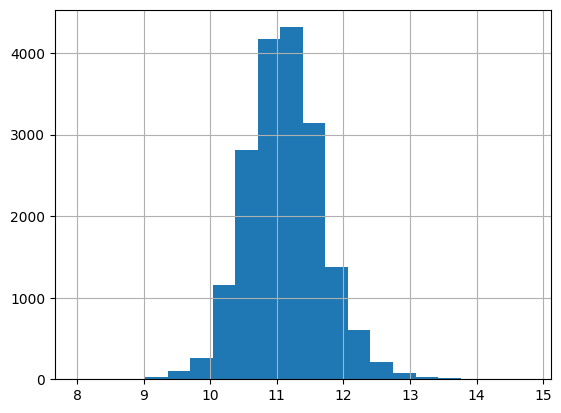

In [6]:
df1['annual_inc_log'] = np.log(df['annual_inc'])
df1['annual_inc_log'].hist(bins=20)

<Axes: >

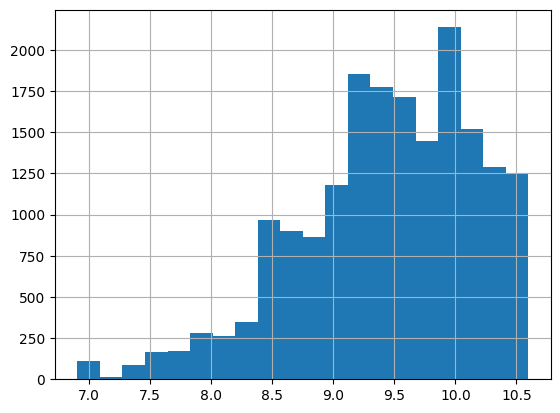

In [7]:
df1['loan_amnt_log'] = np.log(df['loan_amnt'])
df1['loan_amnt_log'].hist(bins=20)

In [8]:
df1.isnull().sum()

annual_inc                 0
home_ownership             0
installment                0
loan_amnt                  0
term                       0
int_rate                   0
avg_cur_bal              566
max_bal_bc              8929
pub_rec_bankruptcies       0
total_acc                  0
total_bal_ex_mort        398
loan_status                0
annual_inc_log             0
loan_amnt_log              0
dtype: int64

In [9]:
df1['avg_cur_bal'].fillna(df1['avg_cur_bal'].mean(),inplace=True)
#df1['inq_last_12m'].fillna(df1['inq_last_12m'].mode(),inplace=True)
df1['max_bal_bc'].fillna(df1['max_bal_bc'].mean(),inplace=True)
df1['total_bal_ex_mort'].fillna(df1['total_bal_ex_mort'].mean(),inplace=True)

In [10]:
df1=df1[['annual_inc_log','home_ownership','installment','loan_amnt_log','term','int_rate','avg_cur_bal','max_bal_bc','pub_rec_bankruptcies','total_acc','total_bal_ex_mort','loan_status']]
df1

annual_inc_log home_ownership  installment  loan_amnt_log  term  \
id                                                                          
802173         11.184421       MORTGAGE       395.66       9.392662    36   
14518910       11.487608           RENT       966.47      10.463103    60   
54333324       11.695247           RENT       806.57      10.126631    36   
62247022       11.775290           RENT       846.17      10.135591    36   
71986114       10.973289       MORTGAGE        41.79       7.090077    36   
...                  ...            ...          ...            ...   ...   
67809746       12.611538       MORTGAGE       164.22       8.517193    36   
66360297       11.695247       MORTGAGE       455.96       9.546813    36   
59699673       11.350407       MORTGAGE       390.36       9.386392    36   
83334760        9.998798           RENT       213.89       8.699515    36   
14939090       12.206073       MORTGAGE       572.29       9.955843    60   

          int_rate   avg_cur_bal    max_bal_bc  pub_rec_bankruptcies  \
id                                                                     
802173       11.49  13466.600011   5728.533475                     0   
14518910     21.99   7019.000000   5728.533475                     0   
54333324      9.99   4891.000000   5728.533475                     0   
62247022     12.69  17619.000000   5728.533475                     0   
71986114     15.31  12321.000000  10372.000000                     0   
...            ...           ...           ...                   ...   
67809746     11.22  67491.000000  23081.000000                     0   
66360297     10.64  15445.000000   5728.533475                     0   
59699673     10.99  21682.000000   5728.533475                     0   
83334760     16.99    843.000000   2539.000000                     0   
14939090     21.18   7449.000000   5728.533475                     1   

          total_acc  total_bal_ex_mort loan_status  
id                                                  
802173           23       51489.151623  Fully Paid  
14518910         24       84227.000000  Fully Paid  
54333324         16       39124.000000  Fully Paid  
62247022         24      123331.000000  Fully Paid  
71986114         17       51794.000000  Fully Paid  
...             ...                ...         ...  
67809746         46      319418.000000  Fully Paid  
66360297         38       63774.000000  Fully Paid  
59699673         31       72686.000000  Fully Paid  
83334760         13        5058.000000  Fully Paid  
14939090         63      193674.000000  Fully Paid  

[18324 rows x 12 columns]

In [11]:
numerical_feature=['annual_inc_log','installment','loan_amnt_log','term','int_rate','avg_cur_bal','max_bal_bc','pub_rec_bankruptcies','total_acc','total_bal_ex_mort']

In [12]:
Q1 = df1[numerical_feature].quantile(0.25)
Q3 = df1[numerical_feature].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5
lower_limit = Q1 - outlier_threshold * IQR
upper_limit = Q3 + outlier_threshold * IQR

# Identify outliers based on the IQR
outliers = ((df1[numerical_feature] < lower_limit) | (df1[numerical_feature] > upper_limit)).any(axis=1)

# Remove outliers from the dataset
df1 = df1[~outliers]
df1=df1[['annual_inc_log','home_ownership','installment','loan_amnt_log','term','int_rate','avg_cur_bal','max_bal_bc','pub_rec_bankruptcies','total_acc','total_bal_ex_mort','loan_status']]

In [13]:
df1['home_ownership'] = df1['home_ownership'].replace('ANY', 'OTHER')

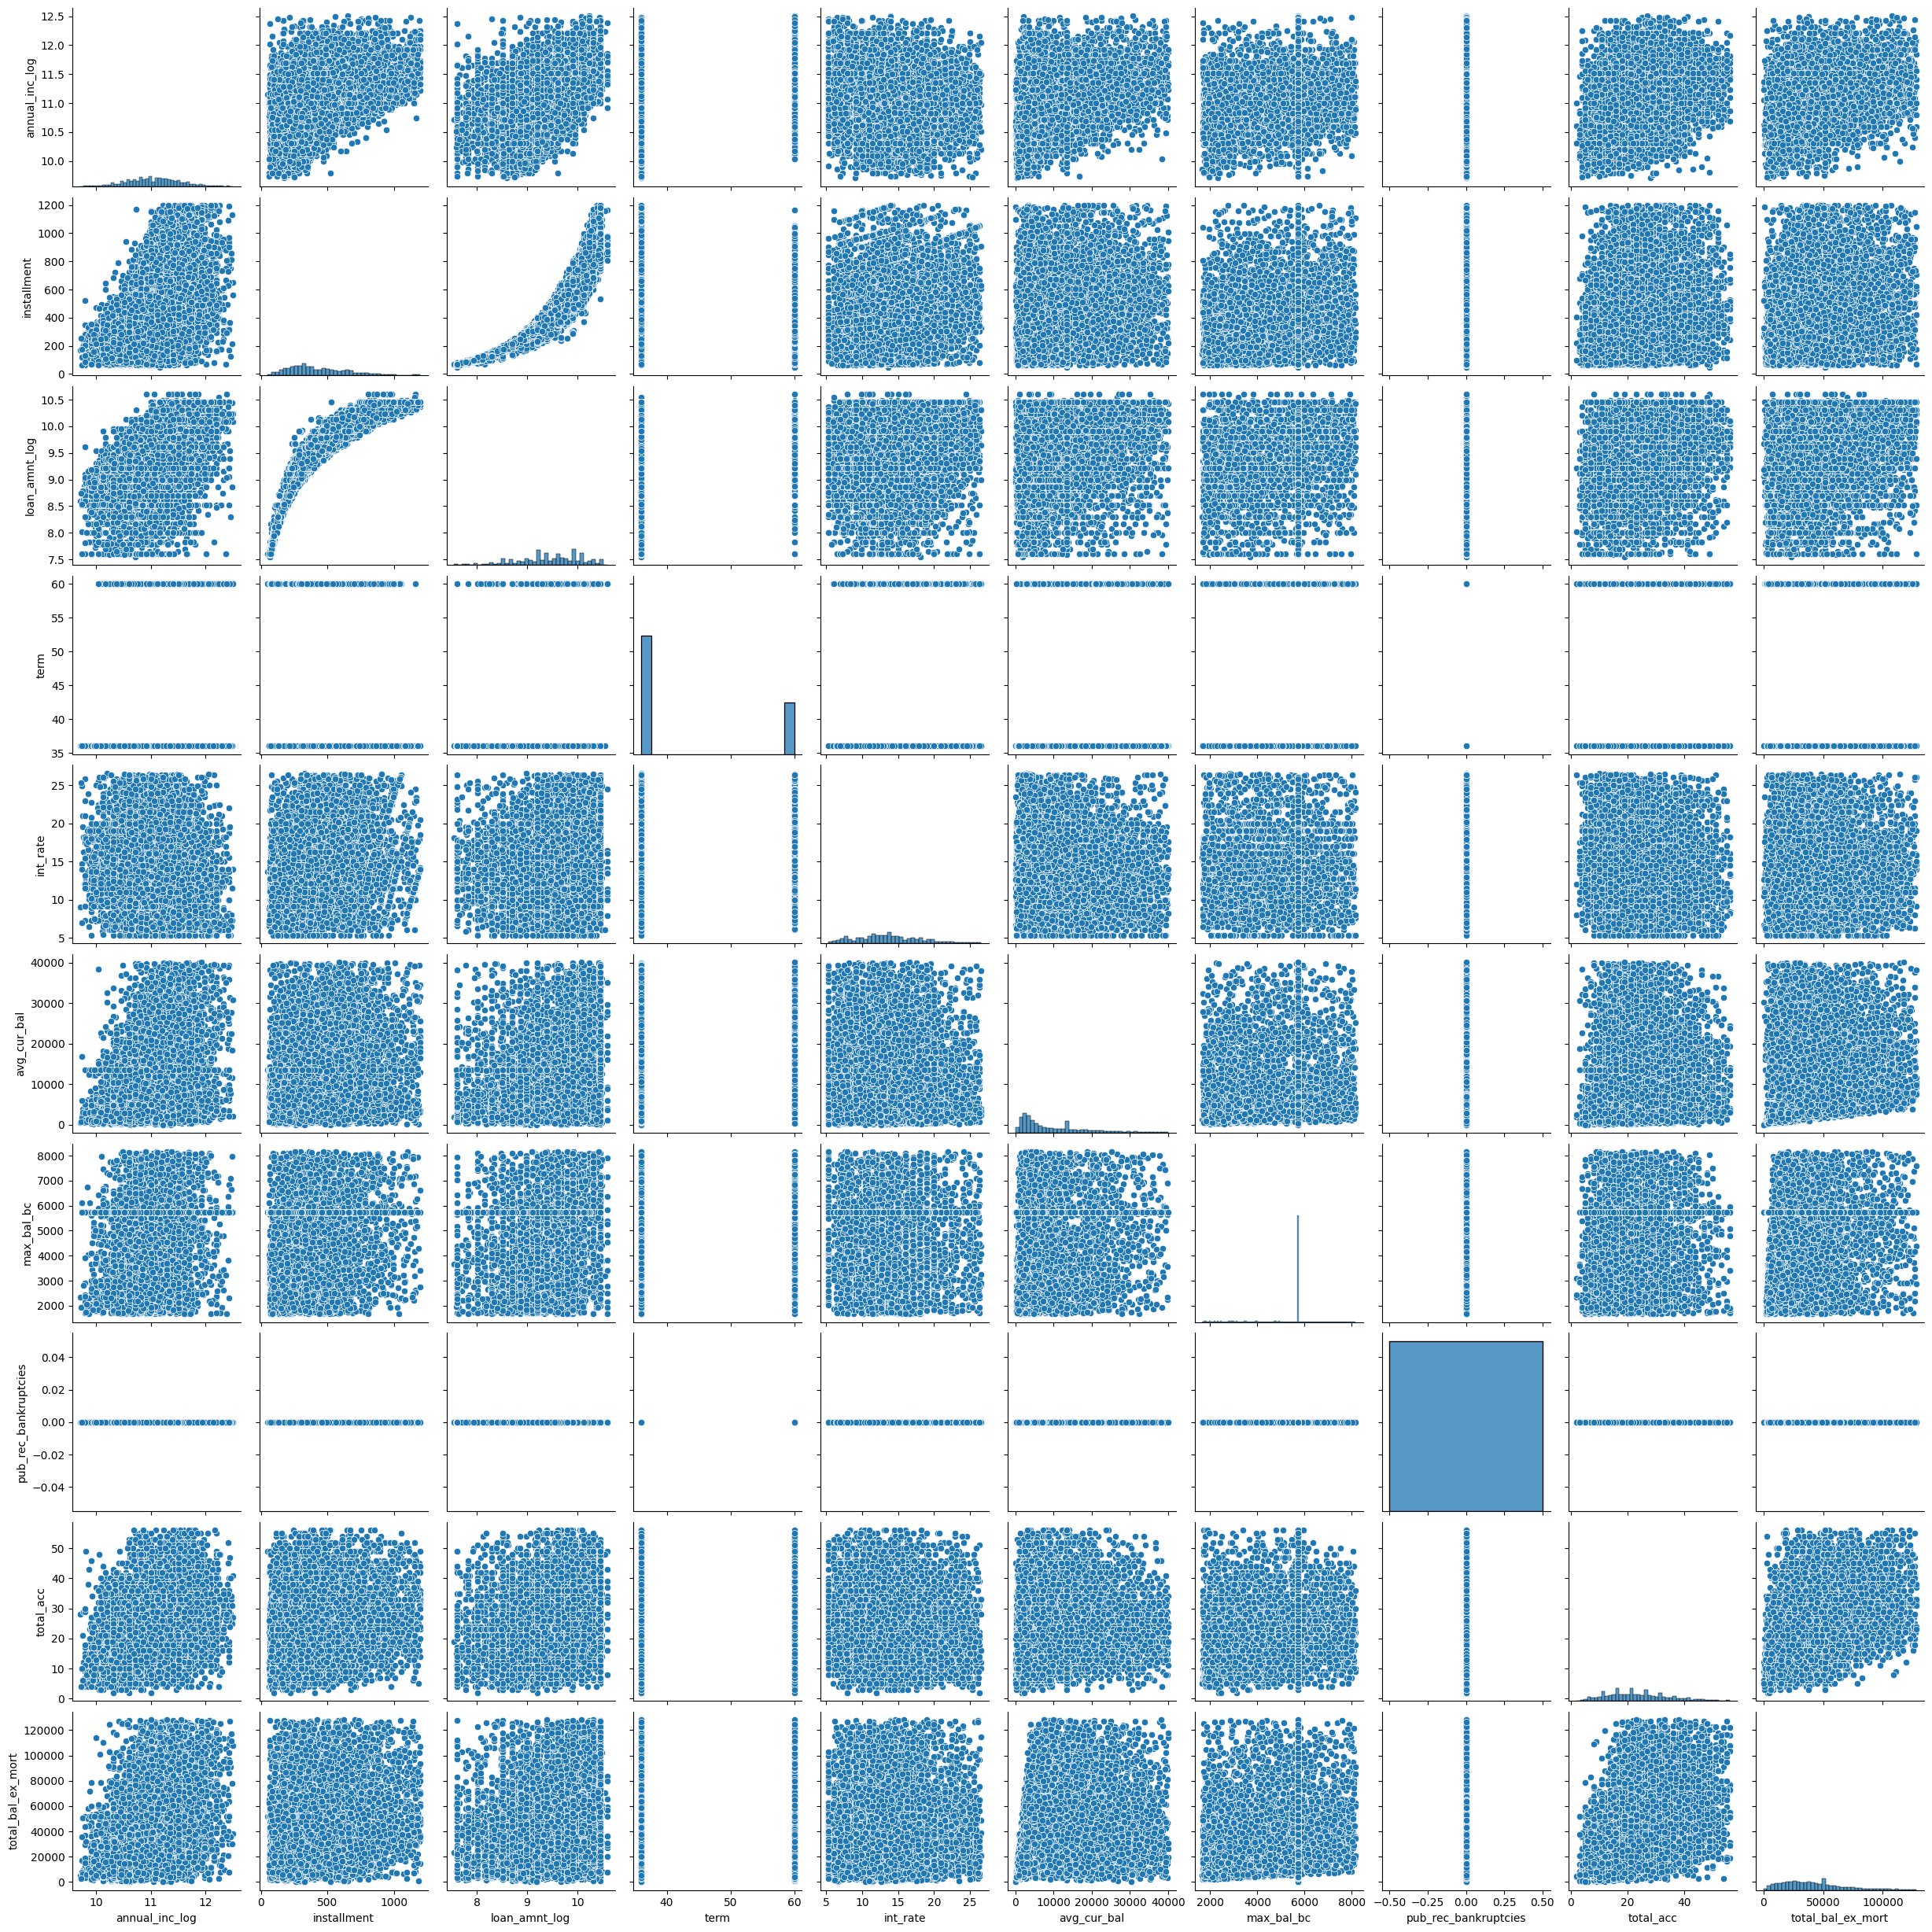

In [14]:
sns.pairplot(df1)

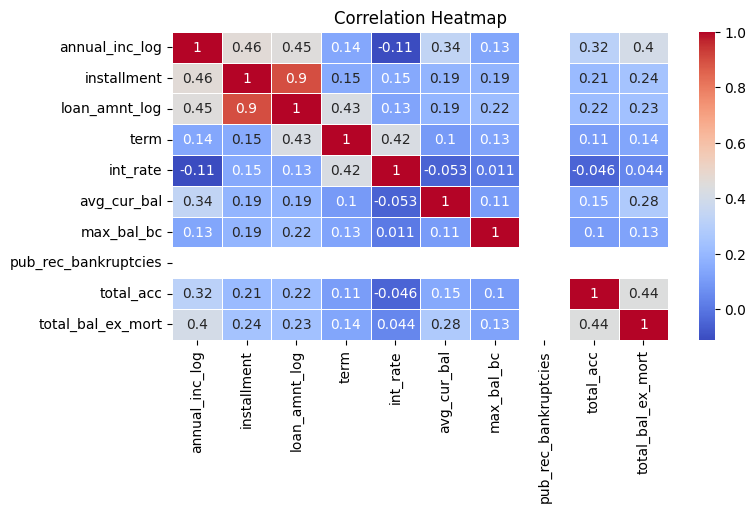

In [15]:
corr_matrix=df1.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#target_corr = corr_matrix['loan_status'].sort_values(ascending=False)
#print(target_corr)

1) The pairplot show the relationship between the numercial data and the Heatmap show the relationship between the data using the color.
2) The Relationship between the Loan Amount and Installment is really strong and this indiacted that they are important feature to consider. 

Fully Paid     8444
Charged Off    2270
Name: loan_status, dtype: int64


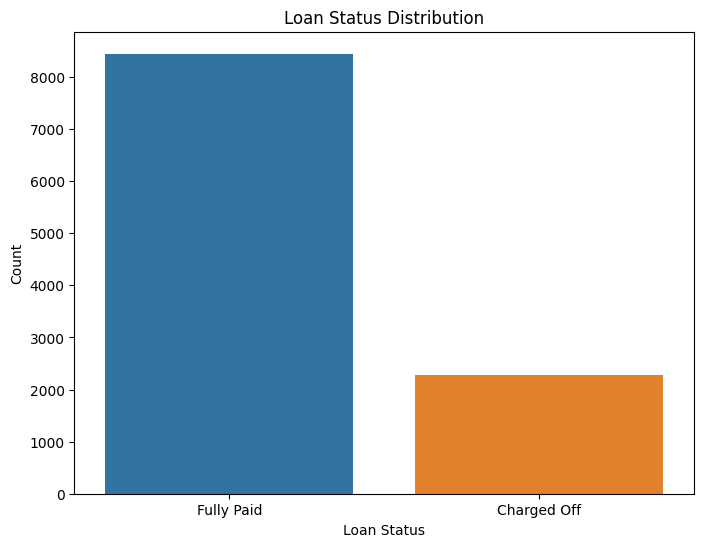

In [16]:
# Count the occurrences of each unique value in the target column
target_counts = df1['loan_status'].value_counts()
print(target_counts)
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

1) From total 10,714 count of Fully Paid and Charged off its can be seen from the graph that about 8444 have paid the Loan whereas the Charged off is just 2270.

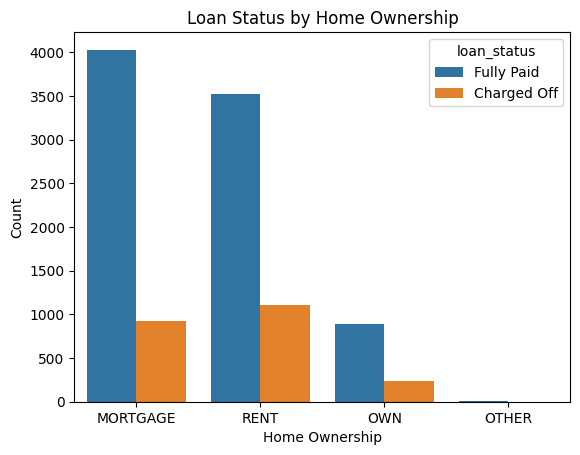

In [17]:
sns.countplot(x='home_ownership', hue='loan_status', data=df1)
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

In [18]:
df['home_ownership'].value_counts()

MORTGAGE    8880
RENT        7382
OWN         2048
ANY           13
OTHER          1
Name: home_ownership, dtype: int64

1) Customer took loan against Mortgage: 8880, Rent : 7382 , Owner : 2048 
2) Customers who took loan against Mortgage where the top to full pay there loan followed by Rent and Owner.
2) Customer who default the loan was onw who took aginst the Rent followed by Mortgage and Owner.

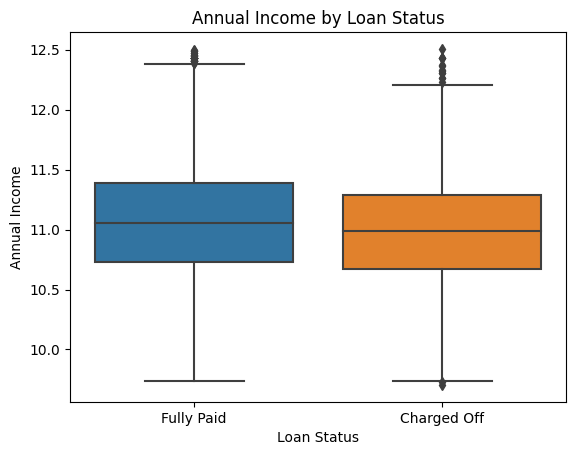

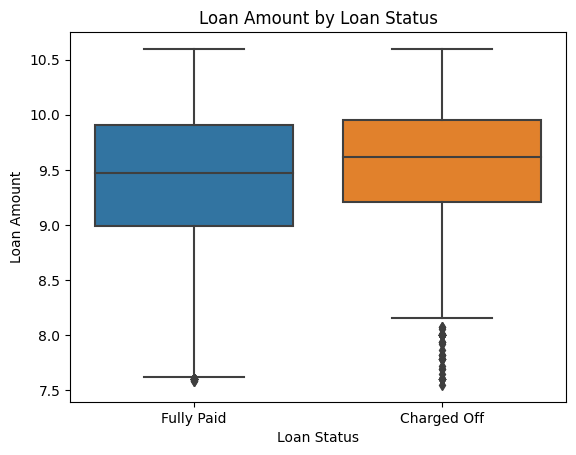

In [19]:
sns.boxplot(x='loan_status', y='annual_inc_log', data=df1)
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

sns.boxplot(x='loan_status', y='loan_amnt_log', data=df1)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

From the Barplot we can predict that if the Annual Income of the Customer is high chances of repaymet is also high where as tehre is no such strong relationship can be said with Loan Amount and Repayment. 

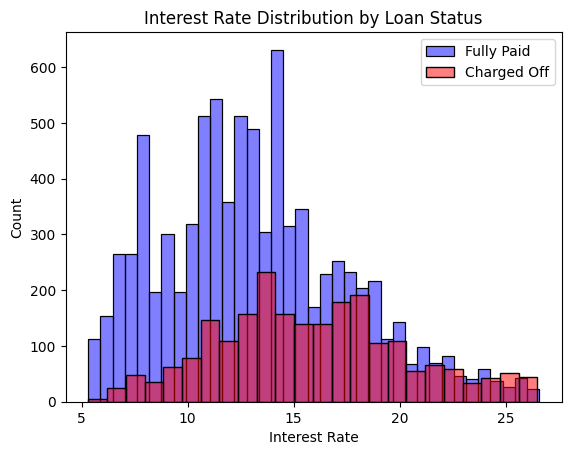

In [20]:
sns.histplot(data=df1[df1['loan_status'] == 'Fully Paid'], x='int_rate', label='Fully Paid', color='blue', alpha=0.5)
sns.histplot(data=df1[df1['loan_status'] == 'Charged Off'], x='int_rate', label='Charged Off', color='red', alpha=0.5)
plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.legend()
plt.show()

1) The Data had many msising value (NaN) which was replaced by its Mode and Mean medium.
2) The Outliers was removed using the Interquartile Range.
3) Categorical data Home Ownership where Any and Others type is 8 in total so replacing the Any category to Others.  
4) From the Intrest rate Graph we can assum the chances of repaymnet are high if customer are in the lower range of Intrest Rate as Intrest Rate incraes by 15% the chances of Dafulter or NPA are high.

## Task 02: Predictive Model

In [21]:
df1['home_ownership'].value_counts()

MORTGAGE    4954
RENT        4623
OWN         1129
OTHER          8
Name: home_ownership, dtype: int64

In [22]:
df1=pd.get_dummies(df1,columns=['home_ownership'],drop_first=True)
#df1_encoded = pd.concat([df1, encoded_features], axis=1)

In [23]:
column = df1.pop('loan_status')

# Insert the column at the last position
df1['loan_status'] = column

# Print the updated DataFrame
df1

annual_inc_log  installment  loan_amnt_log  term  int_rate  \
id                                                                      
802173          11.184421       395.66       9.392662    36     11.49   
14518910        11.487608       966.47      10.463103    60     21.99   
54333324        11.695247       806.57      10.126631    36      9.99   
62247022        11.775290       846.17      10.135591    36     12.69   
46733394        11.373663       629.47      10.085809    60     19.52   
...                   ...          ...            ...   ...       ...   
134213838       10.373491       495.61       9.798127    60     21.85   
125556767       10.085809       246.17       8.853665    36     16.02   
66360297        11.695247       455.96       9.546813    36     10.64   
59699673        11.350407       390.36       9.386392    36     10.99   
83334760         9.998798       213.89       8.699515    36     16.99   

            avg_cur_bal   max_bal_bc  pub_rec_bankruptcies  total_acc  \
id                                                                      
802173     13466.600011  5728.533475                     0         23   
14518910    7019.000000  5728.533475                     0         24   
54333324    4891.000000  5728.533475                     0         16   
62247022   17619.000000  5728.533475                     0         24   
46733394    5896.000000  5728.533475                     0         42   
...                 ...          ...                   ...        ...   
134213838   2911.000000  7807.000000                     0         12   
125556767  10599.000000  2812.000000                     0         14   
66360297   15445.000000  5728.533475                     0         38   
59699673   21682.000000  5728.533475                     0         31   
83334760     843.000000  2539.000000                     0         13   

           total_bal_ex_mort  home_ownership_OTHER  home_ownership_OWN  \
id                                                                       
802173          51489.151623                     0                   0   
14518910        84227.000000                     0                   0   
54333324        39124.000000                     0                   0   
62247022       123331.000000                     0                   0   
46733394        50912.000000                     0                   0   
...                      ...                   ...                 ...   
134213838       20380.000000                     0                   1   
125556767       27973.000000                     0                   0   
66360297        63774.000000                     0                   0   
59699673        72686.000000                     0                   0   
83334760         5058.000000                     0                   0   

           home_ownership_RENT  loan_status  
id                                           
802173                       0   Fully Paid  
14518910                     1   Fully Paid  
54333324                     1   Fully Paid  
62247022                     1   Fully Paid  
46733394                     1  Charged Off  
...                        ...          ...  
134213838                    0  Charged Off  
125556767                    0   Fully Paid  
66360297                     0   Fully Paid  
59699673                     0   Fully Paid  
83334760                     1   Fully Paid  

[10714 rows x 14 columns]

In [24]:

columns_to_scale = ['annual_inc_log','installment','loan_amnt_log','term','int_rate','avg_cur_bal','max_bal_bc','pub_rec_bankruptcies','total_acc','total_bal_ex_mort']

# Create a dictionary to store the scalers
scalers = {}

# Apply scaling on selected columns
for column in columns_to_scale:
    scaler = MinMaxScaler()
    df1[column] = scaler.fit_transform(df1[[column]])
    scalers[column] = scaler

In [25]:
df1['home_ownership_OTHER'] = df1['home_ownership_OTHER'].astype(int)
df1['home_ownership_OWN'] = df1['home_ownership_OWN'].astype(int) 
df1['home_ownership_RENT'] = df1['home_ownership_RENT'].astype(int)

In [26]:
df1

annual_inc_log  installment  loan_amnt_log  term  int_rate  \
id                                                                      
802173           0.528219     0.303156       0.604869   0.0  0.290687   
14518910         0.636437     0.798333       0.956176   1.0  0.784572   
54333324         0.710550     0.659620       0.845750   0.0  0.220132   
62247022         0.739120     0.693973       0.848691   0.0  0.347131   
46733394         0.595766     0.505986       0.832353   1.0  0.668391   
...                   ...          ...            ...   ...       ...   
134213838        0.238769     0.389862       0.737939   1.0  0.777987   
125556767        0.136085     0.173474       0.427977   0.0  0.503763   
66360297         0.710550     0.355466       0.655460   0.0  0.250706   
59699673         0.587465     0.298558       0.602812   0.0  0.267168   
83334760         0.105028     0.145471       0.377386   0.0  0.549389   

           avg_cur_bal  max_bal_bc  pub_rec_bankruptcies  total_acc  \
id                                                                    
802173        0.336161    0.625931                   0.0   0.388889   
14518910      0.175212    0.625931                   0.0   0.407407   
54333324      0.122092    0.625931                   0.0   0.259259   
62247022      0.439815    0.625931                   0.0   0.407407   
46733394      0.147179    0.625931                   0.0   0.740741   
...                ...         ...                   ...        ...   
134213838     0.072666    0.946484                   0.0   0.185185   
125556767     0.264578    0.176126                   0.0   0.222222   
66360297      0.385547    0.625931                   0.0   0.666667   
59699673      0.541238    0.625931                   0.0   0.537037   
83334760      0.021043    0.134022                   0.0   0.203704   

           total_bal_ex_mort  home_ownership_OTHER  home_ownership_OWN  \
id                                                                       
802173              0.401362                     0                   0   
14518910            0.656556                     0                   0   
54333324            0.304975                     0                   0   
62247022            0.961375                     0                   0   
46733394            0.396863                     0                   0   
...                      ...                   ...                 ...   
134213838           0.158864                     0                   1   
125556767           0.218052                     0                   0   
66360297            0.497124                     0                   0   
59699673            0.566593                     0                   0   
83334760            0.039428                     0                   0   

           home_ownership_RENT  loan_status  
id                                           
802173                       0   Fully Paid  
14518910                     1   Fully Paid  
54333324                     1   Fully Paid  
62247022                     1   Fully Paid  
46733394                     1  Charged Off  
...                        ...          ...  
134213838                    0  Charged Off  
125556767                    0   Fully Paid  
66360297                     0   Fully Paid  
59699673                     0   Fully Paid  
83334760                     1   Fully Paid  

[10714 rows x 14 columns]

In [27]:
X = df1.iloc[:,0:13].values
y = df1.iloc[:,-1].values

In [28]:
LabelEncoder = LabelEncoder()
y = LabelEncoder.fit_transform(y)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

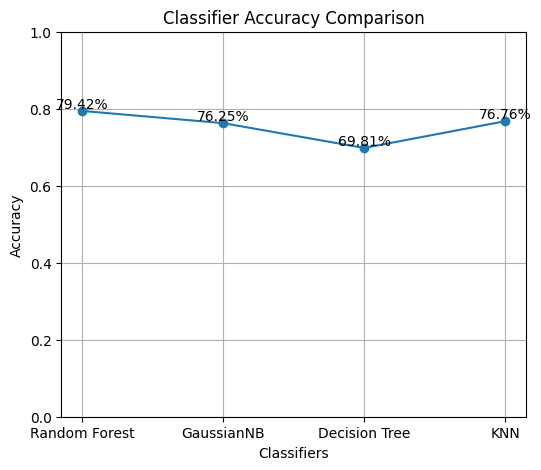

In [30]:
# Create the classifiers
rf_clf = RandomForestClassifier()
nb_clf = GaussianNB()
dt_clf = DecisionTreeClassifier()
kn_clf = KNeighborsClassifier()

classifiers = [rf_clf, nb_clf, dt_clf, kn_clf]
classifier_names = ['Random Forest', 'GaussianNB', 'Decision Tree', 'KNN']

# Train and evaluate the classifiers
accuracy_scores = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_pred, y_test)
    accuracy_scores.append(accuracy)

# Plot the accuracy of classifiers
plt.figure(figsize=(6,5))
plt.plot(classifier_names, accuracy_scores, marker='o')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(True)

# Add percentage values to the graph
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc, f'{acc:.2%}', ha='center', va='bottom')

plt.show()

1) Model Accuracy is high for Random Forest approx. 79% followed by Gaussioan and Desciosn Tree.
2) Feature such as Loan Amount, annual Income, Intrest rate are the important feature to predict wheather teh cstomer will be able to repay the loan sucessfully or will be an defaulter.  